# Breast Cancer Analysis and Prediction

### Table of Content
1.Load libraries and read the data
* 1.1. Load libraries
* 1.2. Read the data
* 1.3. Missing values
* 1.4. Reassign target and drop useless features

2.Exploratory Data Analysis (EDA)
* 2.1. Head and describe
* 2.2. Target distribution (number and %)
* 2.3. Features distribution (hue = diagnosis)
* 2.4. Correlation matrix
* 2.5. Positive correlated features
* 2.6. Uncorrelated features
* 2.7. Negative correlated features

3.Principal Component Analysis
* 3.1. Compute PCA
* 3.2. PCA pie plot with 6 components (88.8%)
* 3.3. PCA scatter plot with 2 components (63.3%)
* 3.4. PCA scatter plot with 3 components (72.7%)

4.Define functions
* 4.1. Confusion matrix and show metrics
* 4.2. Precision – Recall curve
* 4.3. ROC curve
* 4.4. Learning curve
* 4.5. Cross validation metrics

5.Prepare dataset
* 5.1. Define (X, y)
* 5.2. Standard scaler (X)
* 5.3. Train test split

* 6.Predictive model : Logistic Regression
* 6.1. Logistic Regression and GridSearch CV to optimise hyperparameters (accuracy)
* 6.2. RFE : Recursive features elimination (30 features => 15 features)
* 6.3. Compare learning curves and cross validation scores
* 6.4. Select threshold for a recall = 100% (all malignant tumors detected)
* 6.5. Predicting with recall = 100%

7.Predictive model 2 : Ensemble Classifier to maximise precision and detect all malignant tumors
* 7.1. Logistic Regression and GridSearch CV to optimise hyperparameters (recall)
* 7.2. Voting classifier : log + log2
* 7.3. Voting classifier : select threshold (recall = 100%)
* 7.4. Voting classifier : predicting with recall = 100% (precision = 92%)
* 7.5. Models performance plot (accuracy, precision, recall)

### Information : here

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

* ID number
* Diagnosis (M = malignant, B = benign)

Ten real-valued features are computed for each cell nucleus:

* radius (mean of distances from center to points on the perimeter)
* texture (standard deviation of gray-scale values)
* perimeter
* area
* smoothness (local variation in radius lengths)
* compactness (perimeter^2 / area - 1.0)
* concavity (severity of concave portions of the contour)
* concave points (number of concave portions of the contour)
* symmetry
* fractal dimension ("coastline approximation" - 1)

# 1. Load libraries and read the data

## 1.1. Load libraries

In [2]:
# Python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
from itertools import chain
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve, train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score
import warnings
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

warnings.filterwarnings('ignore') #ignore warning messages 

print('Libraries imported')

Libraries imported


## 1.2. Read the data

In [3]:
# Read data
data = pd.read_csv('C:/Users/Nancy/Documents/IBM Data Science/Breast Cancer Analysis and Prediction/data.csv')

In [4]:
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

      ...       texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0     ...               17.33           184.60      2019.0            0.1622   
1     ...               23.41           158.80      1956.0            0.1238   
2     ...               25.53           152.50      1709.0            0.1444   
3     ...               26.50            98.87       567.7            0.2098   
4     ...               16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [5]:
data.tail()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
564  926424         M        21.56         22.39          142.00     1479.0   
565  926682         M        20.13         28.25          131.20     1261.0   
566  926954         M        16.60         28.08          108.30      858.1   
567  927241         M        20.60         29.33          140.10     1265.0   
568   92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

        ...       texture_worst  perimeter_worst  area_worst  \
564     ...               26.40           166.10      2027.0   
565     ...               38.25           155.00      1731.0   
566     ...               34.12           126.70      1124.0   
567     ...               39.42           184.60      1821.0   
568     ...               30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  \
564                0.2216          0.2060                  0.07115   
565                0.1628          0.2572                  0.06637   
566                0.1418          0.2218                  0.07820   
567                0.2650          0.4087                  0.12400   
568                0.0000          0.2871                  0.07039   

     Unnamed: 32  
564          NaN  
565          NaN  
566          NaN  
567          NaN  
568          NaN  

[5 rows x 33 columns]

## 1.3. Missing values

In [8]:
null_feat = pd.DataFrame(len(data['id']) - data.isnull().sum(), columns = ['Count'])

trace = go.Bar(x = null_feat.index, y = null_feat['Count'] ,opacity = 0.8, marker=dict(color = 'green',
        line=dict(color='#000000',width=1.5)))

layout = dict(title =  "Missing Values")
                    
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

All features are complete, only 'Unnamed: 32' is completely null, probably an error in the dataset, we drop it in below

## 1.4. Drop the 'unnamed' field and reassign target features

In [9]:
# Drop useless variables
data = data.drop(['Unnamed: 32','id'],axis = 1)

# Reassign target
data.diagnosis.replace(to_replace = dict(M = 1, B = 0), inplace = True)

# 2. Exploratory Data Analysis (EDA)

## 2.1. Head and describe

In [10]:
# View the data again
data.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean           ...             radius_worst  texture_worst  \
0         0.2419           ...                    25.38          17.33   
1         0.1812           ...                    24.99          23.41   
2         0.2069           ...                    23.57          25.53   
3         0.2597           ...                    14.91          26.50   
4         0.1809           ...                    22.54          16.67   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           184.60      2019.0            0.1622             0.6656   
1           158.80      1956.0            0.1238             0.1866   
2           152.50      1709.0            0.1444             0.4245   
3            98.87       567.7            0.2098             0.8663   
4           152.20      1575.0            0.1374             0.2050   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.7119                0.2654          0.4601   
1           0.2416                0.1860          0.2750   
2           0.4504                0.2430          0.3613   
3           0.6869                0.2575          0.6638   
4           0.4000                0.1625          0.2364   

   fractal_dimension_worst  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678  

[5 rows x 31 columns]

In [11]:
# describe
data.describe()

diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean           ...             radius_worst  texture_worst  \
count     569.000000           ...               569.000000     569.000000   
mean        0.181162           ...                16.269190      25.677223   
std         0.027414           ...                 4.833242       6.146258   
min         0.106000           ...                 7.930000      12.020000   
25%         0.161900           ...                13.010000      21.080000   
50%         0.179200           ...                14.970000      25.410000   
75%         0.195700           ...                18.790000      29.720000   
max         0.304000           ...                36.040000      49.540000   

       perimeter_worst   area_worst  smoothness_worst  compactness_worst  \
count       569.000000   569.000000        569.000000         569.000000   
mean        107.261213   880.583128          0.132369           0.254265   
std          33.602542   569.356993          0.022832           0.157336   
min          50.410000   185.200000          0.071170           0.027290   
25%          84.110000   515.300000          0.116600           0.147200   
50%          97.660000   686.500000          0.131300           0.211900   
75%         125.400000  1084.000000          0.146000           0.339100   
max         251.200000  4254.000000          0.222600           1.058000   

       concavity_worst  concave points_worst  symmetry_worst  \
count       569.000000            569.000000      569.000000   
mean          0.272188              0.114606        0.290076   
std           0.208624              0.065732        0.061867   
min           0.000000              0.000000        0.156500   
25%           0.114500              0.064930        0.250400   
50%           0.226700              0.099930        0.282200   
75%           0.382900              0.161400        0.317900   
max           1.252000              0.291000        0.663800   

       fractal_dimension_worst  
count               569.000000  
mean                  0.083946  
std                   0.018061  
min                   0.055040  
25%                   0.071460  
50%                   0.080040  
75%                   0.092080  
max                   0.207500  

[8 rows x 31 columns]

## 2.2. Distribution of target features(number and %)

In [13]:
# 2 datasets
M = data[(data['diagnosis'] != 0)]
B = data[(data['diagnosis'] == 0)]

In [17]:
#------------COUNT-----------------------
trace = go.Bar(x = (len(M), len(B)), y = ['malignant', 'benign'], orientation = 'h', opacity = 0.8, marker=dict(
        color=[ 'brown', 'green'],
        line=dict(color='#000000',width=1.5)))

layout = dict(title =  'Count of diagnosis variable')
                    
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

#------------PERCENTAGE-------------------
trace = go.Pie(labels = ['benign','malignant'], values = data['diagnosis'].value_counts(), 
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=['green', 'brown'], 
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'Distribution of diagnosis variable')
           
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

## 2.3. Features distribution (hue = diagnosis)

In [28]:
def plot_distribution(data_select, size_bin) :  
    tmp1 = M[data_select]
    tmp2 = B[data_select]
    hist_data = [tmp1, tmp2]
    
    group_labels = ['malignant', 'benign']
    colors = ['brown', 'green']

    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = size_bin, curve_type='kde')
    
    fig['layout'].update(title = data_select)

    py.iplot(fig, filename = 'Density plot')

### Bellow, you can remove the '#' to show all features distribution (except the first line)

In [29]:
#plot distribution 'mean'
plot_distribution('radius_mean', .5)
plot_distribution('texture_mean', .5)
plot_distribution('perimeter_mean', 5)
plot_distribution('area_mean', 10)
#plot_distribution('smoothness_mean', .5)
#plot_distribution('compactness_mean' .5)
#plot_distribution('concavity_mean' .5)
#plot_distribution('concave points_mean' .5)
#plot_distribution('symmetry_mean' .5)
#plot_distribution('fractal_dimension_mean' .5)

In [30]:
#plot distribution 'se'
plot_distribution('radius_se', .1)
plot_distribution('texture_se', .1)
plot_distribution('perimeter_se', .5)
plot_distribution('area_se', 5)
#plot_distribution('smoothness_se', .5)
#plot_distribution('compactness_se', .5)
#plot_distribution('concavity_se', .5)
#plot_distribution('concave points_se', .5)
#plot_distribution('symmetry_se', .5)
#plot_distribution('fractal_dimension_se', .5)

In [31]:
#plot distribution 'worst'
plot_distribution('radius_worst', .5)
plot_distribution('texture_worst', .5)
plot_distribution('perimeter_worst', 5)
plot_distribution('area_worst', 10)
#plot_distribution('smoothness_worst', .5)
#plot_distribution('compactness_worst', .5)
#plot_distribution('concavity_worst', .5)
#plot_distribution('concave points_worst', .5)
#plot_distribution('symmetry_worst', .5)
#plot_distribution('fractal_dimension_worst', .5)

## 2.4. Correlation matrix

In [32]:
#correlation
correlation = data.corr()
#tick labels
matrix_cols = correlation.columns.tolist()
#convert to array
corr_array  = np.array(correlation)

In [46]:
#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   xgap = 2,
                   ygap = 2,
                   colorscale='Viridis',
                   colorbar   = dict() ,
                  )
layout = go.Layout(dict(title = 'Correlation Matrix for variables',
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                     ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9)),
                       )
                  )
fig = go.Figure(data = [trace],layout = layout)
py.iplot(fig)

In [49]:
#Plot Scatter Matrix
#from pandas.tools.plotting import scatter_matrix
#plt.figure(figsize=(20, 20))
#scatter_matrix(data)
#plt.show()

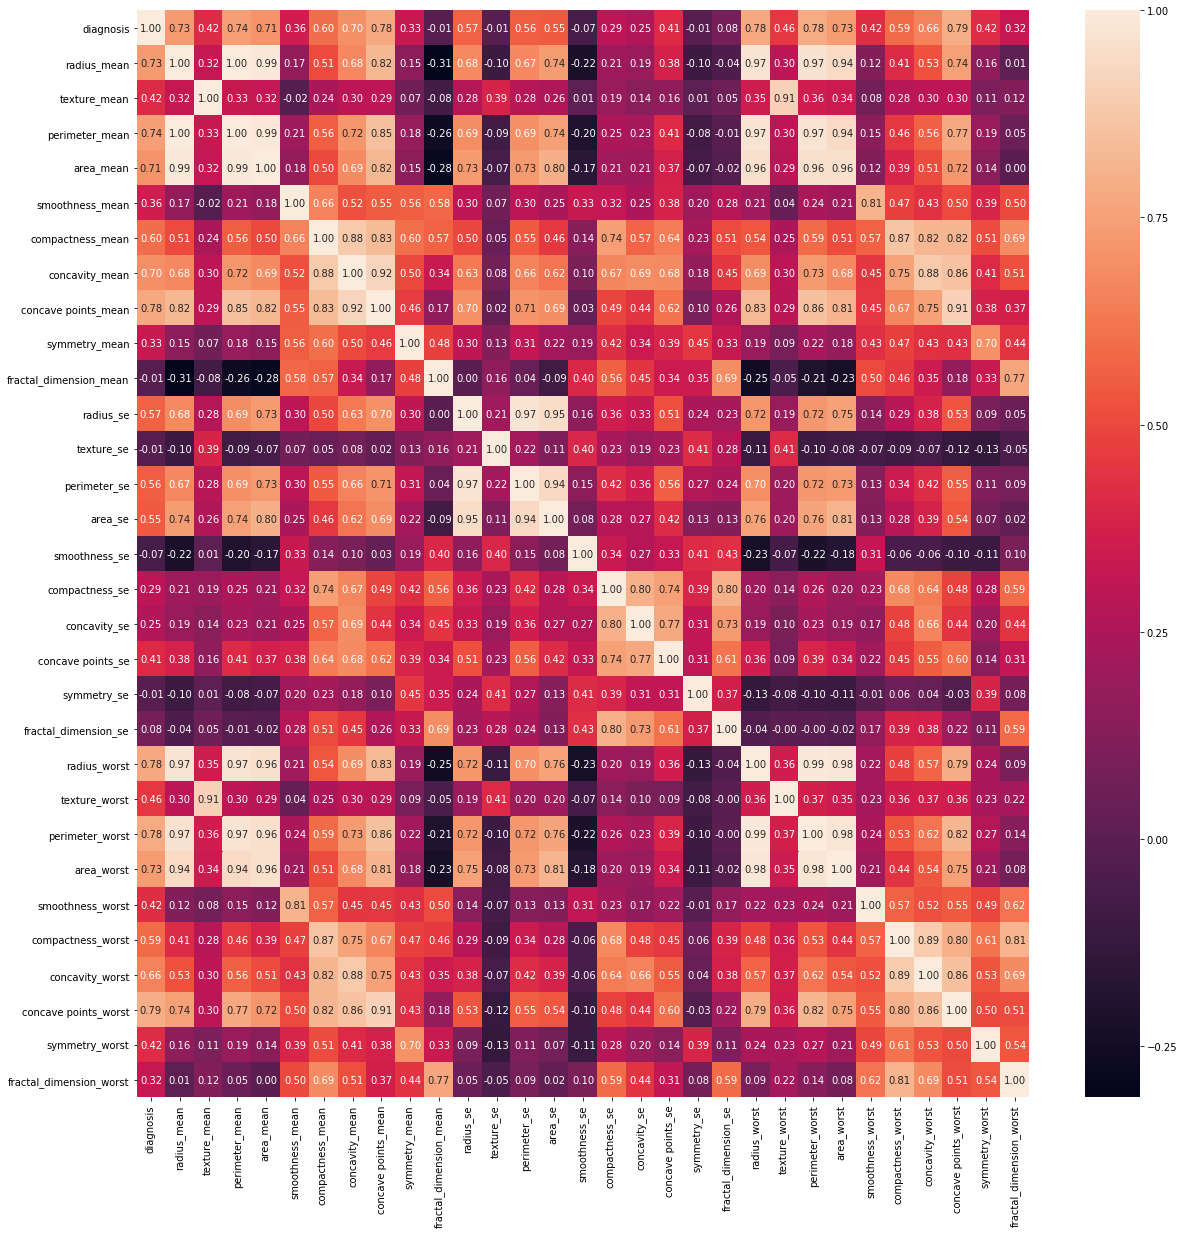

In [51]:
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True,fmt=".2f")
plt.show()

## Let's check the correlation between few features by pair

## 2.5. Positive correlated features

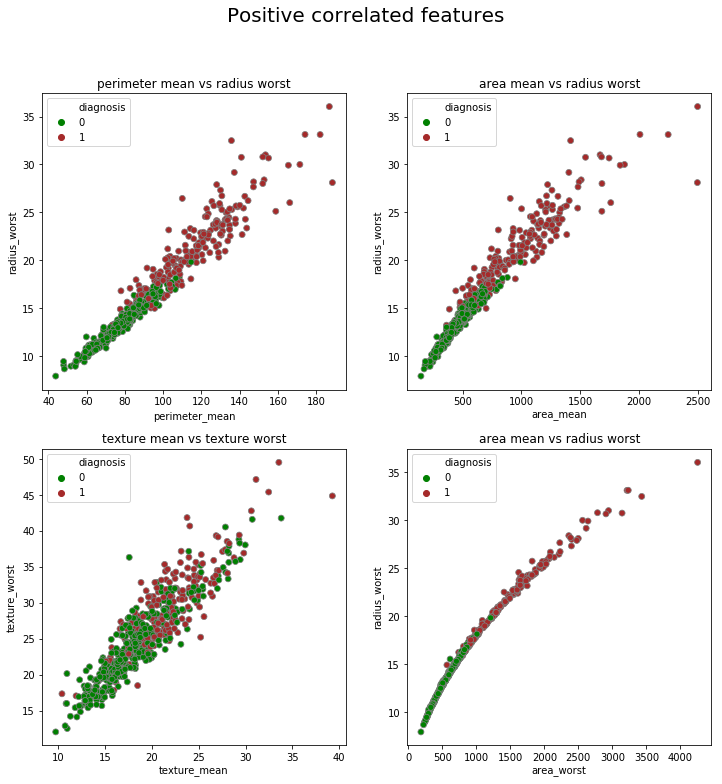

In [56]:
#seaborn version : 

palette ={0 : 'green', 1 : 'brown'}
edgecolor = 'grey'

# Plot +
fig = plt.figure(figsize=(12,12))

plt.subplot(221)
ax1 = sns.scatterplot(x = data['perimeter_mean'], y = data['radius_worst'], hue = "diagnosis",
                    data = data, palette = palette, edgecolor=edgecolor)
plt.title('perimeter mean vs radius worst')

plt.subplot(222)
ax2 = sns.scatterplot(x = data['area_mean'], y = data['radius_worst'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('area mean vs radius worst')

plt.subplot(223)
ax3 = sns.scatterplot(x = data['texture_mean'], y = data['texture_worst'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('texture mean vs texture worst')

plt.subplot(224)
ax4 = sns.scatterplot(x = data['area_worst'], y = data['radius_worst'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('area mean vs radius worst')

fig.suptitle('Positively correlated features', fontsize = 20)
plt.savefig('1')
plt.show()

## 2.6. Uncorrelated features

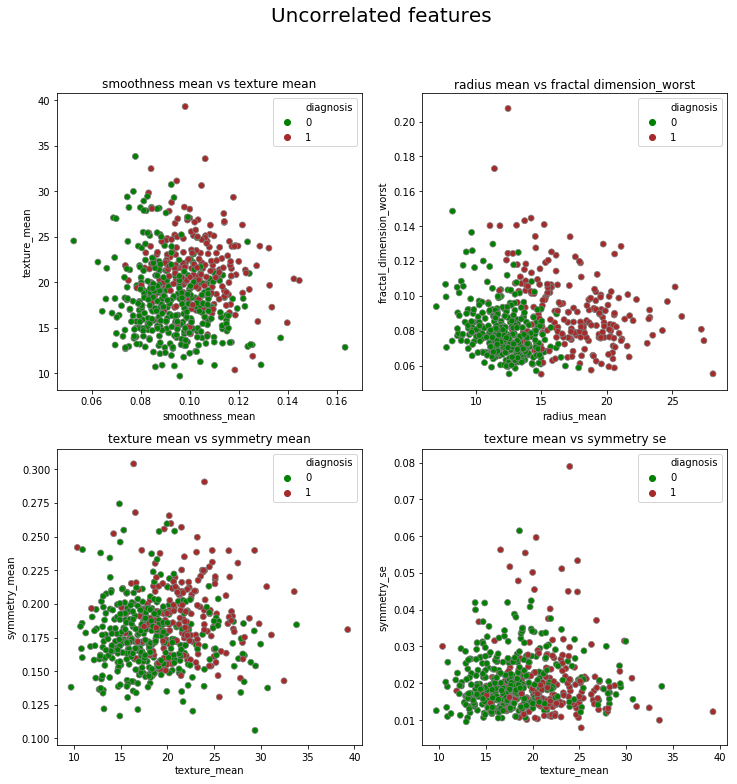

In [58]:
# seaborn version : 
fig = plt.figure(figsize=(12,12))

plt.subplot(221)
ax1 = sns.scatterplot(x = data['smoothness_mean'], y = data['texture_mean'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('smoothness mean vs texture mean')
plt.subplot(222)
ax2 = sns.scatterplot(x = data['radius_mean'], y = data['fractal_dimension_worst'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('radius mean vs fractal dimension_worst')
plt.subplot(223)
ax3 = sns.scatterplot(x = data['texture_mean'], y = data['symmetry_mean'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('texture mean vs symmetry mean')
plt.subplot(224)
ax4 = sns.scatterplot(x = data['texture_mean'], y = data['symmetry_se'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('texture mean vs symmetry se')

fig.suptitle('Uncorrelated features', fontsize = 20)
plt.savefig('2')
plt.show()

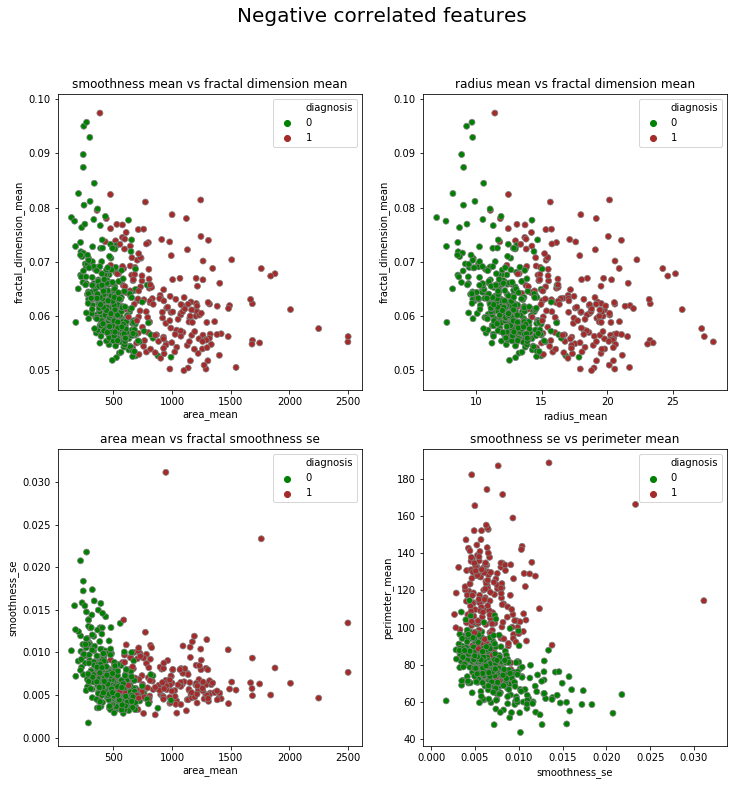

In [59]:
# seaborn version
fig = plt.figure(figsize=(12,12))

plt.subplot(221)
ax1 = sns.scatterplot(x = data['area_mean'], y = data['fractal_dimension_mean'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('smoothness mean vs fractal dimension mean')
plt.subplot(222)
ax2 = sns.scatterplot(x = data['radius_mean'], y = data['fractal_dimension_mean'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('radius mean vs fractal dimension mean')
plt.subplot(223)
ax2 = sns.scatterplot(x = data['area_mean'], y = data['smoothness_se'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('area mean vs fractal smoothness se')
plt.subplot(224)
ax2 = sns.scatterplot(x = data['smoothness_se'], y = data['perimeter_mean'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('smoothness se vs perimeter mean')

fig.suptitle('Negative correlated features', fontsize = 20)
plt.savefig('3')
plt.show()

# 3. Principal Component Analysis (PCA)

## 3.1. Compute PCA

In [63]:
target_pca = data['diagnosis']
data_pca = data.drop('diagnosis', axis=1)

target_pca = pd.DataFrame(target_pca)

#To make a PCA, normalize data is essential
X_pca = data_pca.values
X_std = StandardScaler().fit_transform(X_pca)

pca = PCA(svd_solver='full')
pca_std = pca.fit(X_std, target_pca).transform(X_std)

pca_std = pd.DataFrame(pca_std)
pca_std = pca_std.merge(target_pca, left_index = True, right_index = True, how = 'left')
pca_std['diagnosis'] = pca_std['diagnosis'].replace({1:'malignant',0:'benign'})

## 3.2. PCA pie plot with 6 components (88.8%)

In [64]:
#explained_variance 
var_pca = pd.DataFrame(pca.explained_variance_ratio_)
var_pca = var_pca.T

#----------SUM AND DROP COMP [7:30]
col_list = list(v for v in chain(pca_std.columns[6:30])) 
var_pca['OTHERS_COMP'] = var_pca[col_list].sum(axis=1)
var_pca.drop(var_pca[col_list],axis=1,inplace=True)
var_pca = var_pca.T

In [69]:
labels = ['COMP1','COMP2','COMP3','COMP4','COMP5','COMP6', 'COMP7 - 30']
colors = ['pink', 'green', 'red', 'blue', 'grey', 'orange', 'brown']

trace = go.Pie(labels = labels, values = var_pca[0].values, opacity = 0.8,
               textfont=dict(size=15),
               marker=dict(colors=colors, 
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'PCA : components and explained variance (6 comp = 88.8%)')
 
                   
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

## 3.3. PCA scatter plot with 2 components (63.3%)

In [70]:
pca = PCA(n_components = 2)

pca_std = pca.fit(X_std, target_pca).transform(X_std)
pca_std = pd.DataFrame(pca_std,columns = ['COMP1','COMP2'])
pca_std = pca_std.merge(target_pca,left_index = True,right_index = True,how = 'left')
pca_std['diagnosis'] = pca_std['diagnosis'].replace({1:'malignant',0:'benign'})

In [72]:
def pca_scatter(target,color) :
    tracer = go.Scatter(x = pca_std[pca_std['diagnosis'] == target]['COMP1'] ,
                        y = pca_std[pca_std['diagnosis'] == target]['COMP2'],
                        name = target, mode = 'markers',
                        marker = dict(color = color,line = dict(width = 1))
                       )
    return tracer
layout = go.Layout(dict(title = 'PCA Scatter plot (2 comp = 63.3%)',
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = 'COMP1 = 44.3%',
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = 'COMP2 = 19.0%',
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        height = 800
                       ))
trace1 = pca_scatter('malignant','brown')
trace2 = pca_scatter('benign','green')
plots = [trace2,trace1]
fig = go.Figure(data = plots,layout = layout)
py.iplot(fig)

## 3.4. PCA scatter plot with 3 components (72.7%)

In [73]:
pca = PCA(n_components = 3)
pca_std = pca.fit(X_std, target_pca).transform(X_std)

pca_std = pd.DataFrame(pca_std,columns = ['COMP1','COMP2','COMP3'])
pca_std = pca_std.merge(target_pca, left_index = True, right_index = True,how = 'left')
pca_std['diagnosis'] = pca_std['diagnosis'].replace({1:'malignant',0:'benign'})

In [74]:
M_pca = pca_std[(pca_std['diagnosis'] == 'malignant')]
B_pca = pca_std[(pca_std['diagnosis'] == 'benign')]

In [76]:
trace1 = go.Scatter3d(x = M_pca['COMP1'],
                      y = M_pca['COMP3'],
                      z = M_pca['COMP2'],
                      mode = "markers",
                      name = "malignant",
                      marker = dict(size = 4,color = 'brown',line = dict(width = 1))
                     )
trace2 = go.Scatter3d(x = B_pca['COMP1'],
                      y = B_pca['COMP3'],
                      z = B_pca['COMP2'],
                      name = 'benign',
                      mode = 'markers',
                      marker = dict(size = 4,color= 'green',line = dict(width = 1))
                     )

layout = go.Layout(dict(title = 'PCA Scatter plot (3 comp = 72.7%)',
                        scene = dict(camera = dict(up=dict(x= 0 , y=0, z=0),
                                                   center=dict(x=0, y=0, z=0),
                                                   eye=dict(x=1.25, y=1.25, z=1.25)),
                                     xaxis  = dict(title = 'COMP1',
                                                   gridcolor='rgb(255, 255, 255)',
                                                   zerolinecolor='rgb(255, 255, 255)',
                                                   showbackground=True,
                                                   backgroundcolor='rgb(230, 230,230)'),
                                     yaxis  = dict(title = 'COMP3',
                                                   gridcolor='rgb(255, 255, 255)',
                                                   zerolinecolor='rgb(255, 255, 255)',
                                                   showbackground=True,
                                                   backgroundcolor='rgb(230, 230,230)'
                                                  ),
                                     zaxis  = dict(title = 'COMP2',
                                                   gridcolor='rgb(255, 255, 255)',
                                                   zerolinecolor='rgb(255, 255, 255)',
                                                   showbackground=True,
                                                   backgroundcolor='rgb(230, 230,230)'
                                                  )),height = 700))

plots = [trace1,trace2]
fig  = go.Figure(data = plots,layout = layout)
py.iplot(fig)

# 4. Define functions

This part is essential to measure the performance of a model : roc, cross validation, learning curve ...

## 4.1. Confusion matrix and show metrics

The confusion matrix, also known as the error matrix, allows visualization of the performance of an algorithm :

* true positive (TP) : Malignant tumour correctly identified as malignant
* true negative (TN) : Benign tumour correctly identified as benign
* false positive (FP) : Benign tumour incorrectly identified as malignant
* false negative (FN) : Malignant tumour incorrectly identified as benign

Metrics :

* Accuracy : (TP +TN) / (TP + TN + FP +FN)
* Precision : TP / (TP + FP)
* Recall : TP / (TP + FN)

In [78]:
# Confusion matrix 
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix"',
                          cmap = plt.cm.Blues) :
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Show metrics 
def show_metrics():
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    print('Accuracy  =     {:.3f}'.format((tp+tn)/(tp+tn+fp+fn)))
    print('Precision =     {:.3f}'.format(tp/(tp+fp)))
    print('Recall    =     {:.3f}'.format(tp/(tp+fn)))
    print('F1_score  =     {:.3f}'.format(2*(((tp/(tp+fp))*(tp/(tp+fn)))/
                                                 ((tp/(tp+fp))+(tp/(tp+fn))))))

## 4.2. Precision – Recall curve

The precision-recall curve shows the tradeoff between precision and recall for different threshold

In [80]:
# Precision-recall curve
def plot_precision_recall():
    plt.step(recall, precision, color = 'b', alpha = 0.2,
             where = 'post')
    plt.fill_between(recall, precision, step ='post', alpha = 0.2,
                 color = 'b')

    plt.plot(recall, precision, linewidth=2)
    plt.xlim([0.0,1])
    plt.ylim([0.0,1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.show();

## 4.3. ROC curve

The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.

In [81]:
# ROC curve
def plot_roc():
    plt.plot(fpr, tpr, label = 'ROC curve', linewidth = 2)
    plt.plot([0,1],[0,1], 'k--', linewidth = 2)
   # plt.xlim([0.0,0.001])
   # plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show();

## 4.4. Learning curve

The Learning curve determines cross-validated training and test scores.

In [82]:
# Learning curve
def plot_learning_curve(estimator, title, X, y, ylim = None, cv = None,
                        n_jobs = 1, train_sizes = np.linspace(.1, 1.0, 5)):
    """
    Plots a learning curve. http://scikit-learn.org/stable/modules/learning_curve.html
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv = cv, n_jobs = n_jobs, train_sizes = train_sizes)
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha = 0.1, color = "g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color = "r",
             label = "Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color = "g",
             label = "Cross-validation score")
    plt.legend(loc = "best")
    return plt

## 4.5. Cross validation metrics

Cross-validation is a technique to evaluate predictive models by partitioning the original sample into a training set to train the model, and a test set to evaluate it.

In [84]:
# Cross val metric
def cross_val_metrics(model) :
    scores = ['accuracy', 'precision', 'recall']
    for sc in scores:
        scores = cross_val_score(model, X, y, cv = 5, scoring = sc)
        print('[%s] : %0.5f (+/- %0.5f)'%(sc, scores.mean(), scores.std()))

# 5. Prepare dataset

## 5.1. Define (X, y)

* y = diagnosis (target)
* X = features (radius_mean, area_se, ....)

In [85]:
# Def X and Y
y = np.array(data.diagnosis.tolist())
data = data.drop('diagnosis', 1)
X = np.array(data.as_matrix())

## 5.2. Standard scaler (X)

Why do you need to standardize your data ? For example, a variable that ranges between 0 and 100 will outweigh a variable that ranges between 0 and 1. Using these variables without standardization in effect gives the variable with the larger range a bigger weight in the analysis

In [89]:
# Normalization
scaler = StandardScaler()
X = scaler.fit_transform(X)

## 5.3. Train-test split

In [92]:
# Train_test split
random_state = 123
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.12, random_state = random_state)

# 6. Predictive model : Logistic Regression

## 6.1. Logistic Regression and GridSearch CV to optimise hyperparameters (accuracy)

In [93]:
# Find best hyperparameters (accuracy)
log_clf = LogisticRegression(random_state = random_state)
param_grid = {
            'penalty' : ['l2','l1'],  
            'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]
            }

CV_log_clf = GridSearchCV(estimator = log_clf, param_grid = param_grid , scoring = 'accuracy', verbose = 1, n_jobs = -1)
CV_log_clf.fit(X_train, y_train)

best_parameters = CV_log_clf.best_params_
print('The best parameters for using this model is', best_parameters)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Done  35 out of  42 | elapsed:   18.1s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:   18.2s finished


The best parameters for using this model is {'C': 0.1, 'penalty': 'l2'}


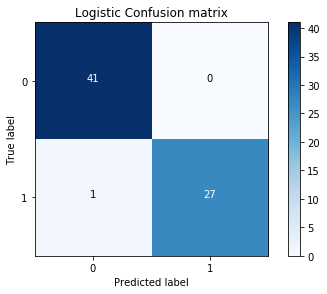

Accuracy  =     0.986
Precision =     1.000
Recall    =     0.964
F1_score  =     0.982


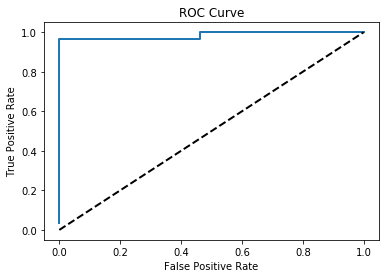

In [94]:
#Log with best hyperparameters
CV_log_clf = LogisticRegression(C = best_parameters['C'], 
                                penalty = best_parameters['penalty'], 
                                random_state = random_state)

CV_log_clf.fit(X_train, y_train)
y_pred = CV_log_clf.predict(X_test)
y_score = CV_log_clf.decision_function(X_test)

# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes=class_names, 
                      title='Logistic Confusion matrix')
plt.savefig('6')
plt.show()

show_metrics()

# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

## 6.2. RFE : Recursive features elimination (30 features => 15 features)

Recursive feature elimination (RFE) is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached. Features are ranked by the model’s coef_ or feature importances

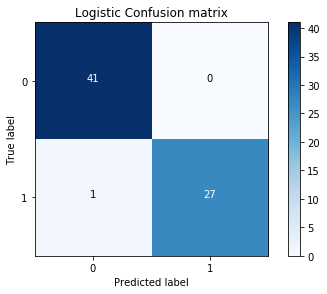

Accuracy  =     0.986
Precision =     1.000
Recall    =     0.964
F1_score  =     0.982


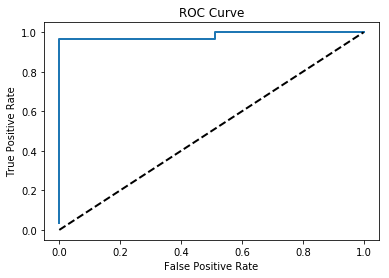

In [95]:
#Logistic regression with RFE
log_clf = LogisticRegression(C = best_parameters['C'], 
                                 penalty = best_parameters['penalty'], 
                                 random_state = random_state)

selector = RFE(log_clf)
selector = selector.fit(X_train, y_train)

y_pred = selector.predict(X_test)
y_score = selector.predict_proba(X_test)[:,1]


# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes=class_names, 
                      title='Logistic Confusion matrix')
plt.show()

show_metrics()

# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

In [96]:
# support and ranking RFE
print(selector.support_)
print(selector.ranking_)

[ True  True  True  True False False False  True False False  True False
 False  True False False False False False False  True  True  True  True
  True False  True  True  True False]
[ 1  1  1  1  9 16  2  1 12  7  1 13  4  1 11  5 15 14 10  3  1  1  1  1
  1  8  1  1  1  6]


## 6.3. Compare learning curves and cross validation scores

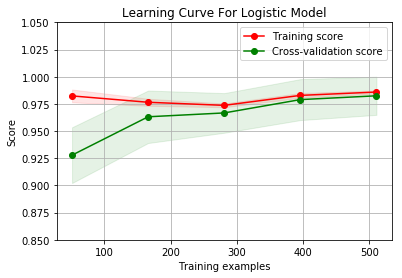

In [99]:
#Learning curve Log with best hyperpara
#plt.figure(figsize=(20, 20))
plot_learning_curve(CV_log_clf, 'Learning Curve For Logistic Model', X, y, (0.85,1.05), 10)
plt.savefig('7')
plt.show()

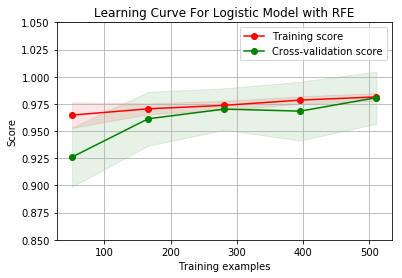

In [100]:
#Learning curve Log with RFE
plot_learning_curve(selector, 'Learning Curve For Logistic Model with RFE', X, y, (0.85,1.05), 10)
plt.show()

In [101]:
# Cross val Log 
cross_log = cross_val_metrics(CV_log_clf)

[accuracy] : 0.98242 (+/- 0.00560)
[precision] : 0.99036 (+/- 0.01181)
[recall] : 0.96235 (+/- 0.01131)


In [102]:
# Cross val Log with RFE
cross_selector = cross_val_metrics(selector)

[accuracy] : 0.97367 (+/- 0.00778)
[precision] : 0.98094 (+/- 0.01754)
[recall] : 0.94817 (+/- 0.01753)


With only 15 features and 5 folds, we got an accuracy of 97.4 with a standard deviation of 0.78. To follow, we don't use the selector, the log cfl is most performant but the code is here for you :)

## 6.4. Select threshold for a recall = 100% (all malignant tumors detected)

For this study, the most important is to detect all malignants tumours.

Recall w/ threshold = 0.1 : 0.9642857142857143
Recall w/ threshold = 0.2 : 0.9642857142857143
Recall w/ threshold = 0.3 : 0.9642857142857143
Recall w/ threshold = 0.4 : 0.9642857142857143
Recall w/ threshold = 0.5 : 0.9642857142857143
Recall w/ threshold = 0.6 : 0.9285714285714286
Recall w/ threshold = 0.7 : 0.8928571428571429
Recall w/ threshold = 0.8 : 0.8571428571428571
Recall w/ threshold = 0.9 : 0.8214285714285714


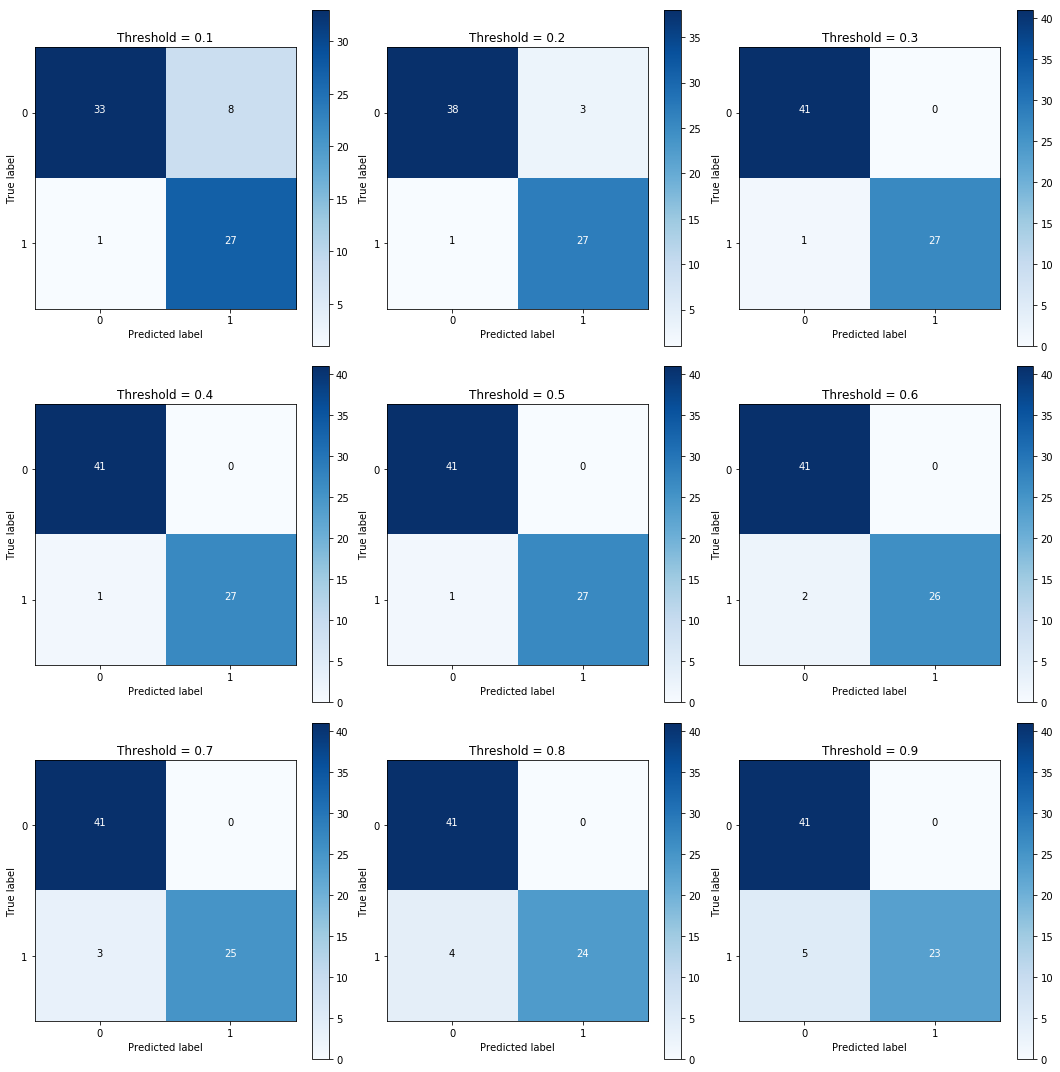

In [103]:
# Threshold
thresholds_adj = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize = (15,15))

j = 1
for i in thresholds_adj:
    y_score = CV_log_clf.predict_proba(X_test)[:,1] > i
    
    
    plt.subplot(3,3,j)
    j += 1
    
    cm = confusion_matrix(y_test, y_score)
    
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    
    print('Recall w/ threshold = %s :'%i, (tp/(tp+fn)))
    
    class_names = [0,1]
    plot_confusion_matrix(cm, 
                          classes=class_names, 
                          title='Threshold = %s'%i) 

## 6.5. Predicting with recall = 100%

In [104]:
# Recall = 1.
y_score = CV_log_clf.predict_proba(X_test)[:,1] > 0.1
cm = confusion_matrix(y_test, y_score)
class_names = [0,1]
show_metrics()

Accuracy  =     0.870
Precision =     0.771
Recall    =     0.964
F1_score  =     0.857


# 7. Predictive model 2 : Ensemble Classifier to maximise precision and detect all malignant tumors


## 7.1. Logistic Regression and GridSearch CV to optimise hyperparameters (recall)

In [106]:
# Find the best parameters (recall)
log2_clf = LogisticRegression(random_state = random_state)
param_grid = {
            'penalty' : ['l2','l1'],  
            'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
            }

CV_log2_clf = GridSearchCV(estimator = log2_clf, param_grid = param_grid , scoring = 'recall', verbose = 1, n_jobs = -1)
CV_log2_clf.fit(X_train, y_train)

best_parameters = CV_log2_clf.best_params_
print('The best parameters for using this model is', best_parameters)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Done  35 out of  42 | elapsed:    4.5s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    4.6s finished


The best parameters for using this model is {'C': 0.01, 'penalty': 'l1'}


In [107]:
# Log w best hyperparameters (recall)
CV_log2_clf = LogisticRegression(C = best_parameters['C'], 
                                 penalty = best_parameters['penalty'], 
                                 random_state = random_state)


CV_log2_clf.fit(X_train, y_train)

y_pred = CV_log2_clf.predict(X_test)
y_score = CV_log2_clf.decision_function(X_test)
# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]

* Grid search CV accuracy, penalty = l2
* Grid search CV recall, penalty = l1

In [108]:
# Cross val log2
cross_val_metrics(CV_log2_clf)

[accuracy] : 0.92439 (+/- 0.02986)
[precision] : 0.86037 (+/- 0.04335)
[recall] : 0.95282 (+/- 0.03352)


## 7.2. Voting classifier : log + log2

In [109]:
#Voting Classifier
voting_clf = VotingClassifier (
        estimators = [('log1', CV_log_clf), ('log_2', CV_log2_clf)],
                     voting='soft', weights = [1, 1])
    
voting_clf.fit(X_train,y_train)

y_pred = voting_clf.predict(X_test)
y_score = voting_clf.predict_proba(X_test)[:,1]

# Confusion maxtrix
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
show_metrics()

Accuracy  =     0.986
Precision =     1.000
Recall    =     0.964
F1_score  =     0.982


In [110]:
# Cross val score voting
cross_voting = cross_val_metrics(voting_clf)

[accuracy] : 0.98245 (+/- 0.00781)
[precision] : 0.98571 (+/- 0.01167)
[recall] : 0.96711 (+/- 0.01872)


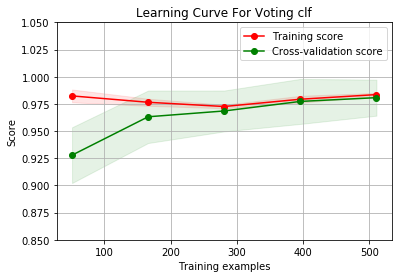

In [111]:
#Learning curve Voting
plot_learning_curve(voting_clf, 'Learning Curve For Voting clf', X, y, (0.85,1.05), 10)
plt.savefig('9')
plt.show()

## 7.3. Voting classifier : select threshold (recall = 100%

Recall w/ threshold = 0.1 : 1.0
Recall w/ threshold = 0.2 : 0.9642857142857143
Recall w/ threshold = 0.3 : 0.9642857142857143
Recall w/ threshold = 0.4 : 0.9642857142857143
Recall w/ threshold = 0.5 : 0.9642857142857143
Recall w/ threshold = 0.6 : 0.8928571428571429
Recall w/ threshold = 0.7 : 0.8571428571428571
Recall w/ threshold = 0.8 : 0.75
Recall w/ threshold = 0.9 : 0.25


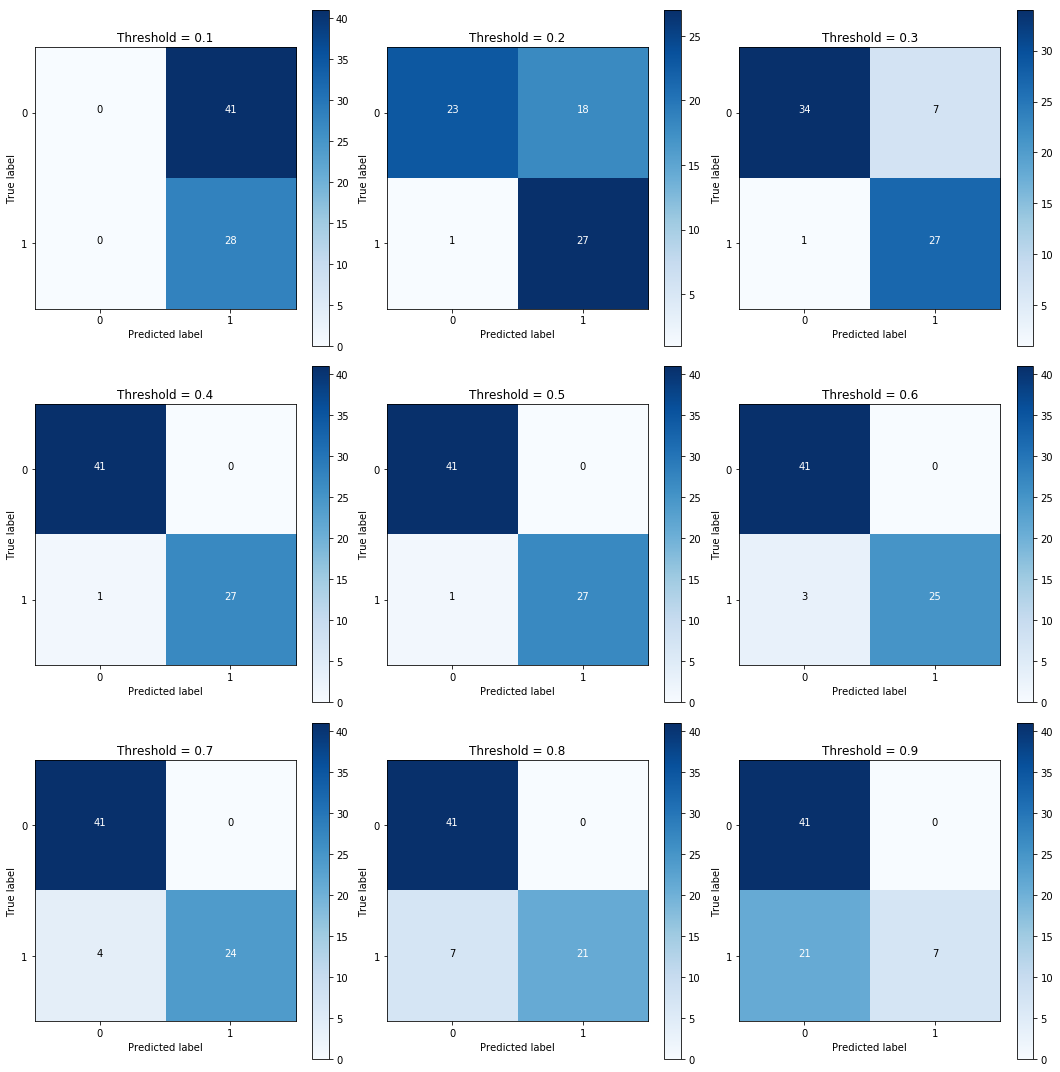

In [112]:
# Threshold
thresholds_adj = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize = (15,15))

j = 1
for i in thresholds_adj:
    y_score = voting_clf.predict_proba(X_test)[:,1] > i
    
    
    plt.subplot(3,3,j)
    j += 1
    
    cm = confusion_matrix(y_test, y_score)
    
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]

    print('Recall w/ threshold = %s :'%i, (tp/(tp+fn)))
    
    class_names = [0,1]
    plot_confusion_matrix(cm, 
                          classes=class_names, 
                          title='Threshold = %s'%i) 

## 7.4. Voting classifier : predicting with recall = 100% (precision = 92%)

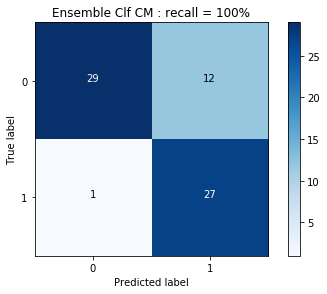

Accuracy  =     0.812
Precision =     0.692
Recall    =     0.964
F1_score  =     0.806


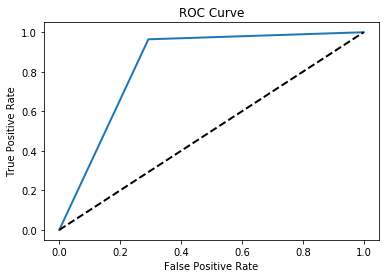

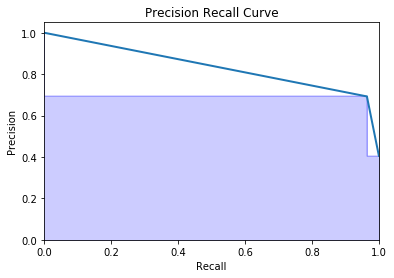

In [113]:
# Ensemble, recall = 1.
y_score = voting_clf.predict_proba(X_test)[:,1] > 0.23
cm = confusion_matrix(y_test, y_score)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes = class_names, 
                      title = 'Ensemble Clf CM : recall = 100%')
plt.savefig('8')
plt.show()

show_metrics()

# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
plot_precision_recall()

# 7.5. Models performance plot (accuracy, precision, recall)

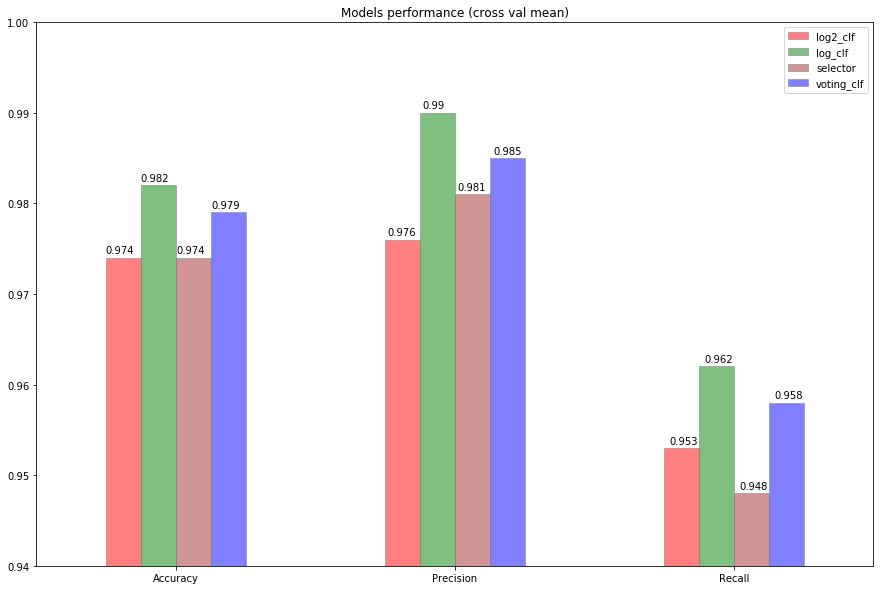

In [116]:
models_metrics = {'log_clf': [0.982, 0.990, 0.962], 
                 'selector': [0.974, 0.981, 0.948],
                 'log2_clf' : [0.974,0.976,0.953],
                 'voting_clf' : [0.979,0.985,0.958]
                }
df = pd.DataFrame(data = models_metrics)
df.rename(index={0:'Accuracy',1:'Precision', 2: 'Recall'}, 
                 inplace=True)
ax = df.plot(kind='bar', figsize = (15,10), ylim = (0.94, 1), 
        color = ['red', 'green', 'brown', 'blue'],
        rot = 0, title ='Models performance (cross val mean)',
        edgecolor = 'grey', alpha = 0.5)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.0005))
plt.show()

## Thank you all !